In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import iDEA
import pickle
from scipy.integrate import simpson
from pathlib import Path

l = 5
points = 500
x = np.linspace(0, l, points)
dx = x[1] - x[0]
v_ext = np.zeros(len(x))
v_int = np.zeros([len(x), len(x)])
pib_double = iDEA.system.System(x, v_ext, v_int, electrons = "ud")

# load states into dictionary
states_1e11 = {}
directory = Path("states_1e-11")
for i in range(200):
    file_path = directory / f"small_int_state_{i}_1e-11.pkl"
    try:
        with file_path.open("rb") as file:
            states_1e11[i] = pickle.load(file)
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

states_0 = {}
for i in range(200):
    file_path_1 = directory / f"zero_int_state_{i}.pkl"
    try:
        with file_path_1.open("rb") as file:
            states_0[i] = pickle.load(file)
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

states_1e0 = {}
directory = Path("states_1e-0")
for i in range(200):
    file_path_2 = directory / f"small_int_state_{i}_1e-0.pkl"
    try:
        with file_path_2.open("rb") as file:
            states_1e0[i] = pickle.load(file)
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")



In [2]:
energies_1e11 = []
for key, value in states_1e11.items():
    energies_1e11.append(value.energy / ((np.pi)**2))

energies_0 = []
for key, value in states_0.items():
    energies_0.append(value.energy / ((np.pi)**2))

energies_1e0 = []
for key, value in states_1e0.items():
    energies_1e0.append(value.energy / ((np.pi)**2))


print(len(energies_1e0))


200


In [3]:
class States:
    def __init__(self, energy):
        self.states = []
        self.energy = energy

    def addState(self, state):
        self.states.append(state)

    def getStates(self):
        return self.states

    def getEnergy(self):
        return self.energy

def run_comparison(energies_small_int, energies_int, zoom=None, tol=1e-12):
    

    # plot graph
    plt.plot(np.round(energies_small_int, decimals=4), color="green", marker="x")
    plt.plot(np.round(energies_int, decimals=4), color="red", marker="x")
    plt.xlabel("State number")
    plt.ylabel("Energy of state (per pi squared)")
    plt.grid()
    if zoom != None:
        plt.xlim(zoom[0], zoom[1])
        plt.title(f"Plot for states {zoom[0]} to {zoom[1]}")
    
    plt.title(f"Plot for states {0} to {len(energies_int)-1}")
    plt.legend(["Energies from interacting = 1e-11", "Energies from interacting = 0"])

    print(f"Do all energies match up: {np.allclose(energies_int, energies_small_int)}")

    energies_int = energies_small_int
    summary = []
    j = 0

    while j < len(energies_int):
        if j > 0 and np.abs(energies_int[j] - energies_int[j-1]) <= tol:
            # print(f"States {j-1}, {j}, ", end='')
            deg_states = States(energies_int[j])
            deg_states.addState(j-1)
            deg_states.addState(j)
            i = j + 1
            while i < len(energies_int):
                if np.abs(energies_int[i] - energies_int[i-1]) <= tol:
                    # print(i, end=', ')
                    deg_states.addState(i)
                    i += 1
                else:
                    break
            summary.append(deg_states)
            # print(f"have the same energy: {energies_interacting_100[j]}")
            j = i  # Move the outer loop index to the end of current degenerate states
        else:
            j += 1

    # Print the summary of degenerate states
    multiplets = []
    multiplet_energies = []
    for deg_states in summary:
        states = deg_states.getStates()
        multiplets.append(states)
        energy = deg_states.getEnergy()
        multiplet_energies.append(energy)

        print(f"For small interaction: Degenerate states: {states}, Degeneracy: {len(states)}, Energy: {energy}")
    
    with open(f"small_multiplets_0_200.pkl", "wb") as file:
        pickle.dump(multiplets, file)
        print("Done")
    with open(f"small_multiplets_energies_0_200.pkl", "wb") as file:
        pickle.dump(multiplet_energies, file)
        print("Done")

Do all energies match up: True
For small interaction: Degenerate states: [1, 2], Degeneracy: 2, Energy: 0.09649405532756294
For small interaction: Degenerate states: [4, 5], Degeneracy: 2, Energy: 0.192988044167986
For small interaction: Degenerate states: [6, 7], Degeneracy: 2, Energy: 0.25088447073060194
For small interaction: Degenerate states: [8, 9], Degeneracy: 2, Energy: 0.32807951161091115
For small interaction: Degenerate states: [11, 12], Degeneracy: 2, Energy: 0.3859759381735156
For small interaction: Degenerate states: [13, 14], Degeneracy: 2, Energy: 0.4824699270140768
For small interaction: Degenerate states: [15, 16], Degeneracy: 2, Energy: 0.5017683394444197
For small interaction: Degenerate states: [17, 18], Degeneracy: 2, Energy: 0.5596647660069777
For small interaction: Degenerate states: [20, 21], Degeneracy: 2, Energy: 0.6561587548474469
For small interaction: Degenerate states: [22, 23], Degeneracy: 2, Energy: 0.714054373837047
For small interaction: Degenerate st

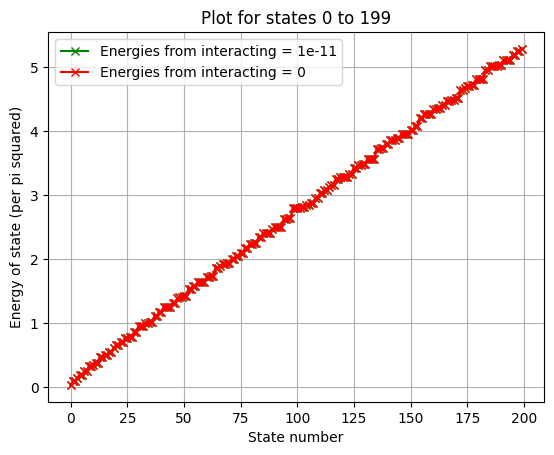

In [4]:
run_comparison(energies_1e11, energies_0, tol=1e-5)

In [5]:
import multiplet_classes
import multiplet_methods as m

def pib_energy_fix(index):
    return ((index+1)**2) / (2*((l+2*dx)**2))
def pib_energy(index):
    return ((index+1)**2) / (50)
result = m.calculate_energy(pib_energy_fix, pib_double, 200)

m.calculate_multiplets(result)

with open("small_multiplets_0_200.pkl", "rb") as file:
    test = pickle.load(file)
with open("small_multiplets_energies_0_200.pkl", "rb") as file:
    energies = pickle.load(file)

summary = result.check_expected_num_of_multiplets(test, energies, break_first=True)

print(result.multiplets)
print(test)

# print(result.multiplet_energies)

for key, value in summary.items():
    print(f'{key}: {value}')
    print('---') 

File indices_up_to_20.pkl exists
Elapsed Time = 0.018817515000137064
[[1, 2], [4, 5], [6, 7], [8, 9], [11, 12], [13, 14], [15, 16], [17, 18], [20, 21], [22, 23], [24, 25], [26, 27], [28, 29], [30, 31, 32], [33, 34], [35, 36], [37, 38], [39, 40], [41, 42, 43, 44], [45, 46], [48, 49], [50, 51], [52, 53], [54, 55], [56, 57, 58, 59], [60, 61], [62, 63], [64, 65], [67, 68], [69, 70], [71, 72], [73, 74], [75, 76], [77, 78], [79, 80], [81, 82], [83, 84], [85, 86, 87, 88], [90, 91, 92, 93], [94, 95], [96, 97], [98, 99, 100, 101], [102, 103], [104, 105], [106, 107], [108, 109], [110, 111], [112, 113], [115, 116], [117, 118], [119, 120, 121, 122], [123, 124], [125, 126], [127, 128], [129, 130], [131, 132, 133, 134], [135, 136], [137, 138], [139, 140], [141, 142, 143], [144, 145], [146, 147, 148, 149], [150, 151], [152, 153], [154, 155], [156, 157, 158, 159], [160, 161], [162, 163], [164, 165], [166, 167], [168, 169], [170, 171], [172, 173], [175, 176], [177, 178], [179, 180, 181, 182], [183, 184

In [6]:
for i in range(len(test)):
    print(f"states {test[i]}, with energy {energies[i]}")

states [1, 2], with energy 0.09649405532756294
states [4, 5], with energy 0.192988044167986
states [6, 7], with energy 0.25088447073060194
states [8, 9], with energy 0.32807951161091115
states [11, 12], with energy 0.3859759381735156
states [13, 14], with energy 0.4824699270140768
states [15, 16], with energy 0.5017683394444197
states [17, 18], with energy 0.5596647660069777
states [20, 21], with energy 0.6561587548474469
states [22, 23], with energy 0.714054373837047
states [24, 25], with energy 0.7719508003996574
states [26, 27], with energy 0.7912502222904634
states [28, 29], with energy 0.8684447892401377
states [30, 31, 32], with energy 0.9649374239221725
states [33, 34], with energy 1.0035362566832058
states [35, 36], with energy 1.0228338504847376
states [37, 38], with energy 1.1193278393252601
states [39, 40], with energy 1.1772250845166325
states [41, 42, 43, 44], with energy 1.2544172600284376
states [45, 46], with energy 1.3123136865910339
states [48, 49], with energy 1.4088

Do all energies match up: False
Done
Done


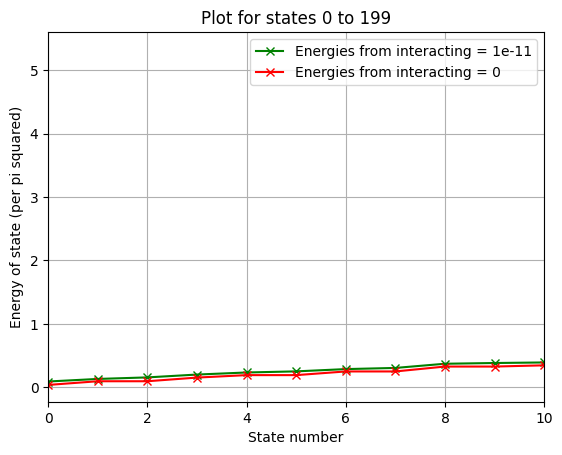

In [8]:
run_comparison(energies_1e0, energies_0, zoom=[0, 10])